In [13]:
import numpy as np
import matplotlib.pyplot as plt
import csv


# Exercise 7: Continuous Markov Process and Gillespie

In this exercise, the Gillespie algorithm is implemented in c to simulate Markov processes that are continuous in time. The general idea is that the duration of time between events, as well as the event that happens, are chosen randomly but following the underlying statistics of the process. 

The time step $\tau$ is drawn from an exponential distribution:
$$ \tau \sim \frac{1}{\lambda_C} exp(-\lambda_c t ) $$

To sample from this distribution I used the inversion Method (see exercise 1-5), by calculating the cumulative distribution and finding its inverse Function,
 $$ F^{-1} (u) = -  \frac{1}{\lambda_C}* ln(u)$$
where $u$ is a uniformly distributed variable on the interval $[0,1)$

Which event happens after that time step is decided by calculating the probabilities of the different events from thei rates, and again using the inversion method to get a random variable distributed according to this propability density from a uniform random number. 

On this sheet, two systems were used as examples. 

## Lotka - Volterra 
The Lotka-Volterra Model describes the population dynamics in a simple predator-prey system, Where $X$ is the population number of the prey, and $Y$ the population size of the predator, while the $k_i$ are parameters that influence the strength of the interactions.
$k_1$ plays the role of the birthrate of the prey, $ k_2 $ is the interaction strength between predator and prey, in this case how much prey gets eaten to give rise to a rise in the predator population, and $k_3$ is the death rate of the predator. These can be summed up in differential equations

$$ \frac{\partial X}{\partial t} = k_1  X - k_2 X Y \\ \frac{\partial Y}{\partial t} = k_2 X Y  -k_3 Y $$
These differential equations have a Fixed Point $(X_*,Y_*) = (\frac{k_3}{k_2}) , \frac{k_1}{k_2}$ . Without stochasticity, in the mean field approach,  the populations oscillate around this fixed point with a certain constant amplitude depending on the initial conditions. In phase space the trajectories around the fixed point are closed, which represents those sustained oscillations..

For the Gillespie algorithm, the chemical rates of the processes (birth, predation, death ) are required. These are calculated from the rate parrameters of the differential equations, multiplied by the involved species:
$$ w_1 = k_1  X for (X \ , Y  \ \rightarrow X +1 \ , Y) \\ w_2 = k_2  X  Y for (X \ , Y  \ \rightarrow X -1 \ , Y +1) \\ w_3 = k_3 Y for (X \ , Y  \ \rightarrow X \ , Y -1) $$
The total rate of all processes is the decay parameter of the time-step distribution $\lambda_c = w_{tot} = \sum_i w_i$ and the probability of each of the three events is given by $p_i = \frac{w_i}{w_tot}$

Below the results of simulations of a Lotka-Volterra system with the Gillespie Algorithm are shown, using  rates $k_1 = 3; k_2 = 0.01, k_3 = 5$ and different Inital conditions with varying distances from the fix point are shown. For these parameters, the fixed point is $C_* = ( 500, 300)$



15

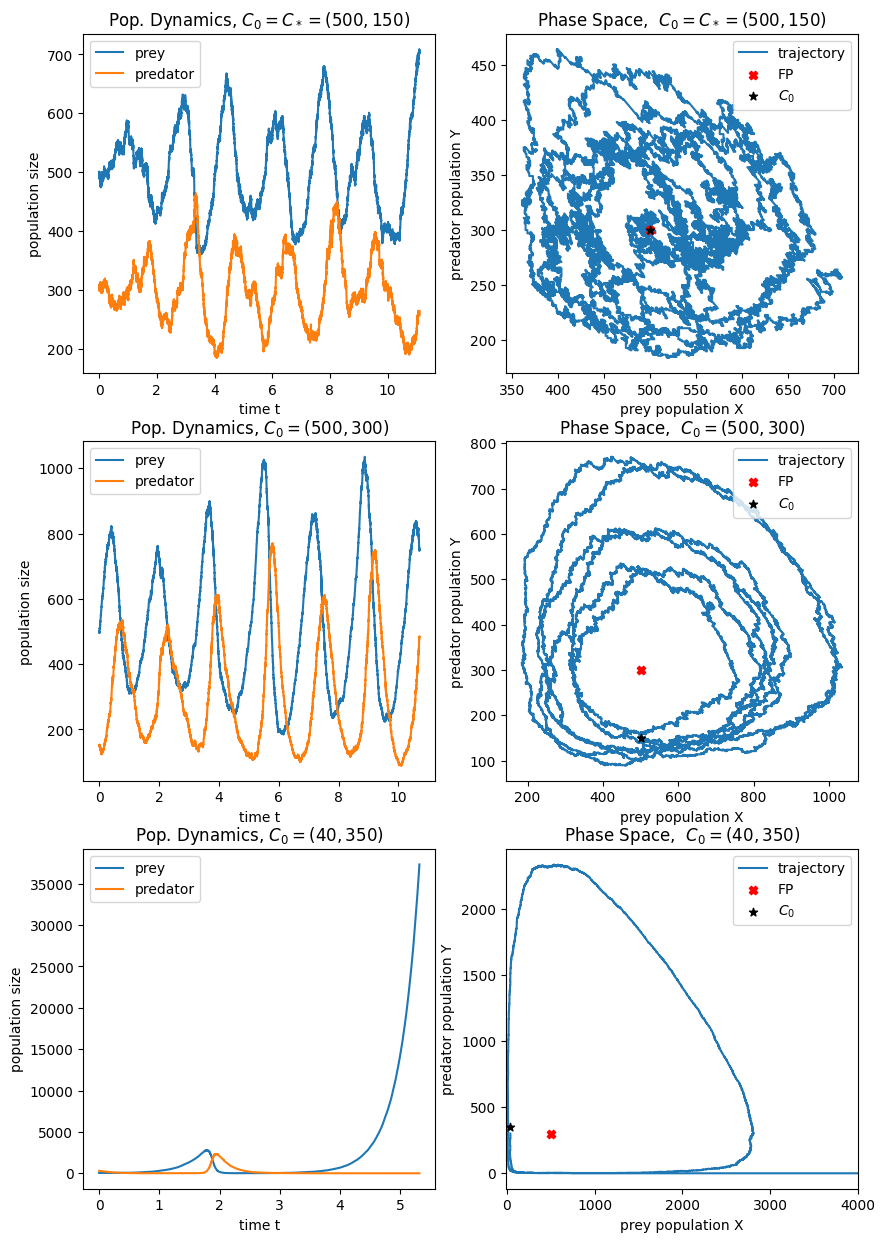

In [14]:



data = []
with open('exercise_8.csv') as csvfile:
    contents= csv.reader(csvfile, delimiter=";")
    next(contents)#skip header line
    for row in contents:
        data.append(np.asarray(row[:-1]).astype('double'))

inital_conditions_str=["C_* = (500,150) $","(500,300) $", "(40,350) $" ]

initial_conditions=[(500,300),(500,150), (40,350)]
k= np.array([3, 0.01,5])
fp_x= k[2]/k[1]
fp_y= k[0]/k[1]
fig,axs= plt.subplots(3,2, figsize=(10,15))
for i in range(0,3):
    axs[i][0].set_title("Pop. Dynamics, $C_0 = " + inital_conditions_str[i])
    axs[i][0].set_xlabel("time t")
    axs[i][0].set_ylabel("population size")
    axs[i][0].plot(data[i*3],data[i*3+1], label = "prey")
    axs[i][0].plot(data[i*3],data[i*3+2], label = "predator")
    axs[i][0].legend()
    axs[i][1].set_title("Phase Space,  $C_0 = "+ inital_conditions_str[i])
    axs[i][1].set_xlabel("prey population X")
    axs[i][1].set_ylabel("predator population Y")
   

    axs[i][1].plot(data[i*3+1],data[i*3+2], label="trajectory" )
    axs[i][1].scatter(fp_x,fp_y, label= "FP", color= "red", marker = "X",zorder= 2)
    axs[i][1].scatter(*initial_conditions[i],  color= "black", marker = "*",label= "$C_0$", zorder= 2)
    axs[i][1].legend()
axs[2][1].set_xlim(-10,4000)

len(data)


#plt.scatter(fp_x, fp_y,marker="x", c= "red")

One can clearly see the expectes oscillations in the population Dynamics. Without stochasticity, when the inital conditions are at the fixed point, we would expect them to stay there because it is a stationary solution. With stochasticity, the fluctuations make the trajectories leave the Fixed points to explore different orbits around it. Being further away from the fixed point in hase space corresponds to larger amplitudes in the oscillations. There seems to be a kind of higher level oscillation in the amplitudes, with trajectories moving away from the fixed point and then in again.

For initial conditions that are further away from the fixed point, the oscillations become faster and larger in amplitude. 
starting very far away from the fixed point or  fairly close to the axes can result in extinction events. This is shown in the last row: starting with a small number of prey animals leads to a majority of the predators dying out, which is enough to start one massive spike in first prey, and then predator populations, but because the birth rate of prey is not enough to sustain that large predator population, the predators go completely extinct. with $Y =0$ the differential equation describing prey dynamics simplifies to
$$ \frac{\partial X}{\partial t} = k_1  X $$ 

the solution of which is simple exponential growth which is clearly visible in the population dynamics plot. In Phase space, the trajectory completely breaks out from the orbits around the FP.

Next the effect of changing the parameters $k_i$  on the extinction of the predator is investigated. 
In general, changing the parameters results in changing the Fixed point. Having a Fixed Point close to the initial conditions means trajectories will start of on trajectories that do not take the population to extremes, neither high nor low, making extinction events less likely

 

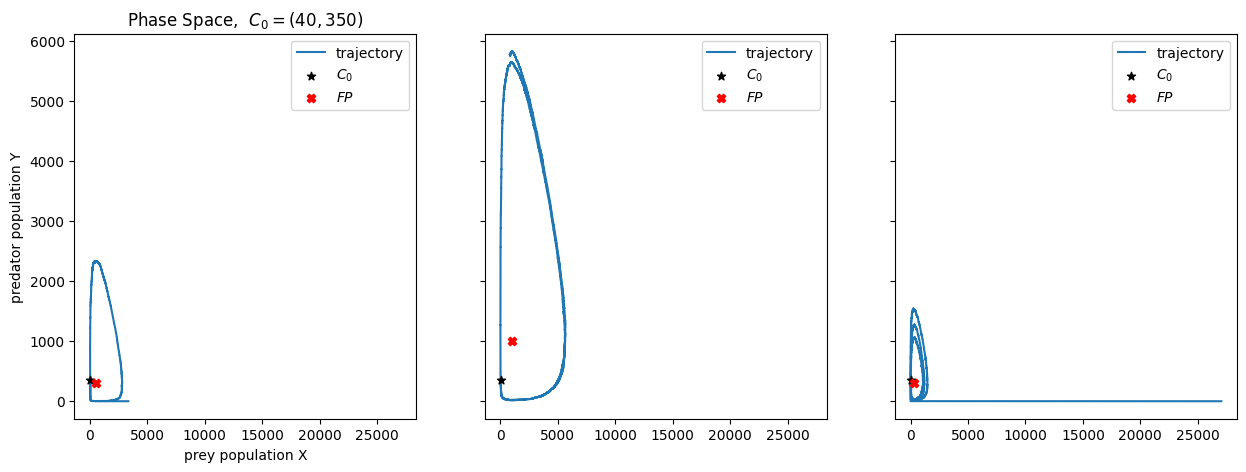

In [15]:
fig, axs= plt.subplots(1,3,figsize=(15,5),sharex=True, sharey=True)
ks=[[3,0.01,5],[5,0.005,5],[3,0.01,3] ]


axs[0].set_title("Phase Space,  $C_0 = "+ inital_conditions_str[2])
axs[0].set_xlabel("prey population X")
axs[0].set_ylabel("predator population Y")

axs[0].plot(data[7][:16000],data[8][:16000], label="trajectory" )
axs[1].plot(data[10],data[11], label="trajectory" )
axs[2].plot(data[13],data[14], label="trajectory" )

axs[0].scatter(*initial_conditions[2],  color= "black", marker = "*",label= "$C_0$", zorder= 2)
axs[0].scatter(ks[0][2]/ks[0][1], ks[0][0]/ks[0][1] , color= "red", marker = "X",label= "$FP$", zorder= 2)
axs[1].scatter(*initial_conditions[2],  color= "black", marker = "*",label= "$C_0$", zorder= 2)
axs[1].scatter(ks[1][2]/ks[1][1], ks[1][0]/ks[1][1] , color= "red", marker = "X",label= "$FP$", zorder= 2)
axs[2].scatter(*initial_conditions[2],  color= "black", marker = "*",label= "$C_0$", zorder= 2)
axs[2].scatter(ks[2][2]/ks[2][1], ks[2][0]/ks[2][1] , color= "red", marker = "X",label= "$FP$", zorder= 2)
axs[0].legend()
axs[1].legend()
axs[2].legend()
plt.show()

### Exercise 7.2 Brusselator
 
Below, the simulation of a Brusselator with initial concentrations of [x] =2200 and [y]=2200 is plotted for three different reaction volumes $\Omega$. one can see that decreasing the reaction volume leads to a defacto dampening of the oscilations. In the smallest volume, the oscillations are almost in the overdampened limit. in the mid sized volume, the oscillations are sustained but smaller in volume. In the largest reaction Volume, the System can unfold fully.

In [16]:
data = []
with open('exercise_8_B.csv') as csvfile:
    contents= csv.reader(csvfile, delimiter=";")
    next(contents)#skip header line
    for row in contents:
        data.append(np.asarray(row[:-1]).astype('double'))



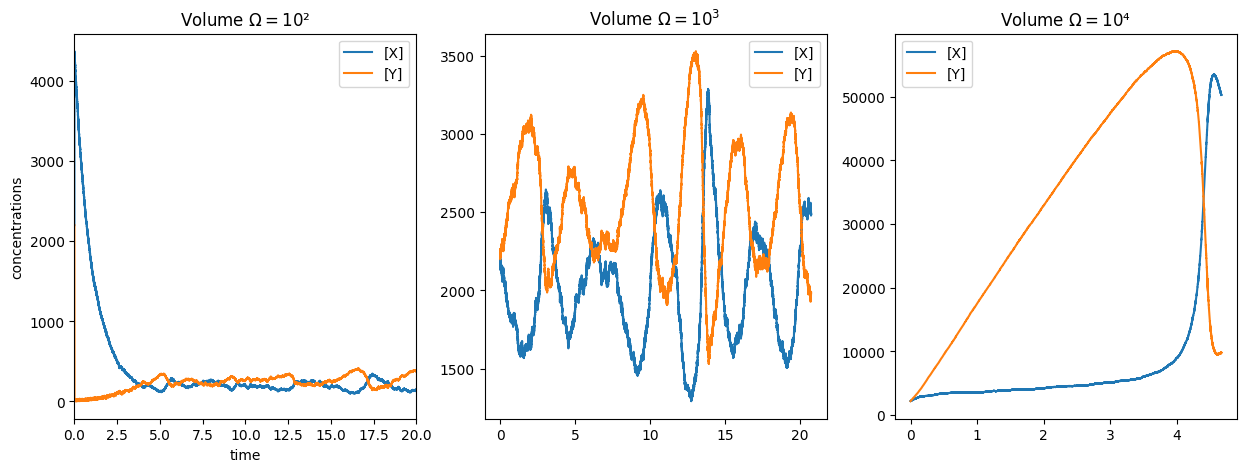

In [17]:
fig, axs= plt.subplots(1,3,figsize=(15,5))



axs[0].set_title("Volume $\Omega = 10²$ ")
axs[1].set_title("Volume $\Omega = 10^3$ ")
axs[2].set_title("Volume $\Omega = 10⁴$ ")
axs[0].set_xlim(0,20)

axs[0].set_xlabel("time")
axs[0].set_ylabel("concentrations")

axs[0].plot(data[0],data[1], label="[X]")
axs[0].plot(data[0],data[2], label="[Y]")
axs[1].plot(data[3],data[4], label="[X]")
axs[1].plot(data[3],data[5], label="[Y]")
axs[2].plot(data[6],data[7], label="[X]")
axs[2].plot(data[6],data[8], label="[Y]" )

axs[0].legend()
axs[1].legend()
axs[2].legend()
plt.show()